Загрузка библиотек и фреймворков

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats

from sklearn import cluster
from sklearn import neighbors
from sklearn import naive_bayes

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib as mpl

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2

plt.rcParams.update({"font.size": 5, "lines.linewidth": 1})

Построение исходных данных
Сгенерируйте 3 выборки по 200 элементов из двумерных нормальных
распределений с центрами в точках (3,3), (9,2), (9,6) и диагональными
ковариационными матрицами с элементами (1.5,1.5), (1,1), (1,1). Решить
задачу кластеризации методом k средних. Нарисуйте результирующие
графики. Сделайте выводы.

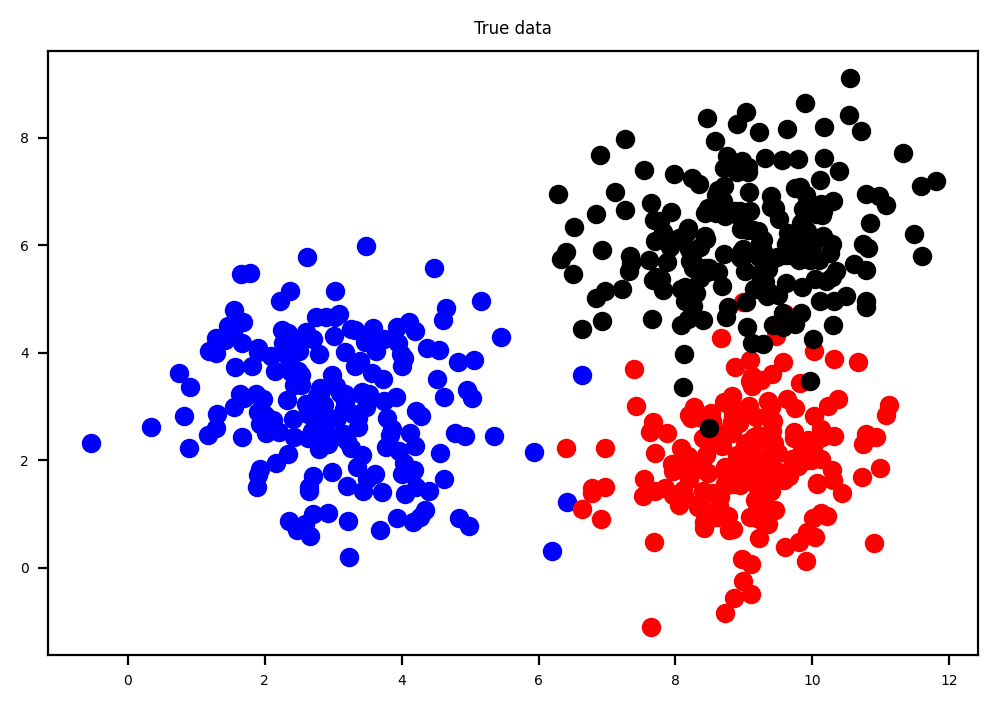

In [41]:
def generate_data_2d(size : int, center : np.ndarray, covar_diag : np.ndarray):
    cov = np.array([[covar_diag[0], 0], [0, covar_diag[1]]])
    data = np.random.multivariate_normal(mean=center, cov=cov, size=size)
    return data


SIZE = 200
data1 = generate_data_2d(200, np.array([3, 3]), np.array([1.5, 1.5]))
data2 = generate_data_2d(200, np.array([9, 2]), np.array([1, 1]))
data3 = generate_data_2d(200, np.array([9, 6]), np.array([1, 1]))


plt.plot(data1[:,0], data1[:,1], 'bo')
plt.plot(data2[:,0], data2[:,1], 'ro')
plt.plot(data3[:,0], data3[:,1], 'ko')
plt.title("True data")

plt.show()

600


Text(0.5, 1.0, 'Cluster')

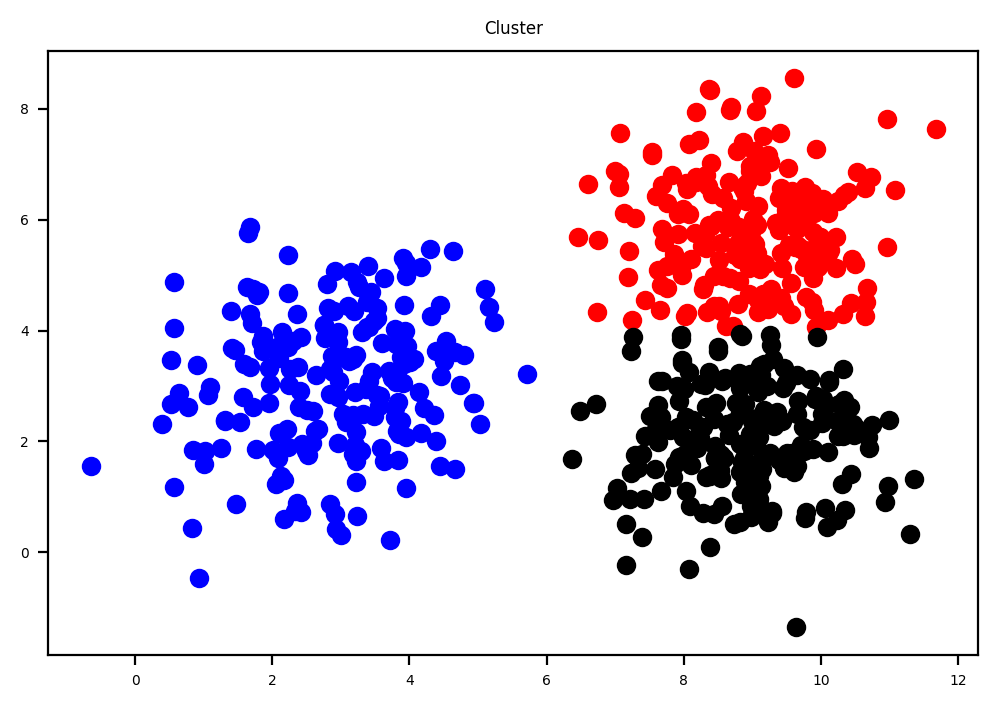

In [33]:
# clusters
n_classes = 3

X = np.concatenate((np.concatenate((data1, data2)), data3))
print(len(X))

cluster_model = cluster.KMeans(n_clusters=n_classes)
cluster_model.fit(X)
clust_y = cluster_model.predict(X)

predict = [[] for _ in range(n_classes)]
for xi, yi in zip(X, clust_y):
    predict[yi].append(xi)

preData1 = np.array(predict[0])
preData2 = np.array(predict[1])
preData3 = np.array(predict[2])

plt.plot(preData1[:,0], preData1[:,1], 'ro')
plt.plot(preData2[:,0], preData2[:,1], 'bo')
plt.plot(preData3[:,0], preData3[:,1], 'ko')

plt.title("Cluster")

Обучение моделей

In [42]:
def split_predicted_data(X, model):
    res = model.predict(X)
    
    i_neight_data1 = np.argwhere(res == 0)
    i_neight_data2 = np.argwhere(res == 1)
    i_neight_data3 = np.argwhere(res == 2)
    
    neight_data1 = X[i_neight_data1[:,0]]
    neight_data2 = X[i_neight_data2[:,0]]
    neight_data3 = X[i_neight_data3[:,0]]
    return neight_data1, neight_data2, neight_data3

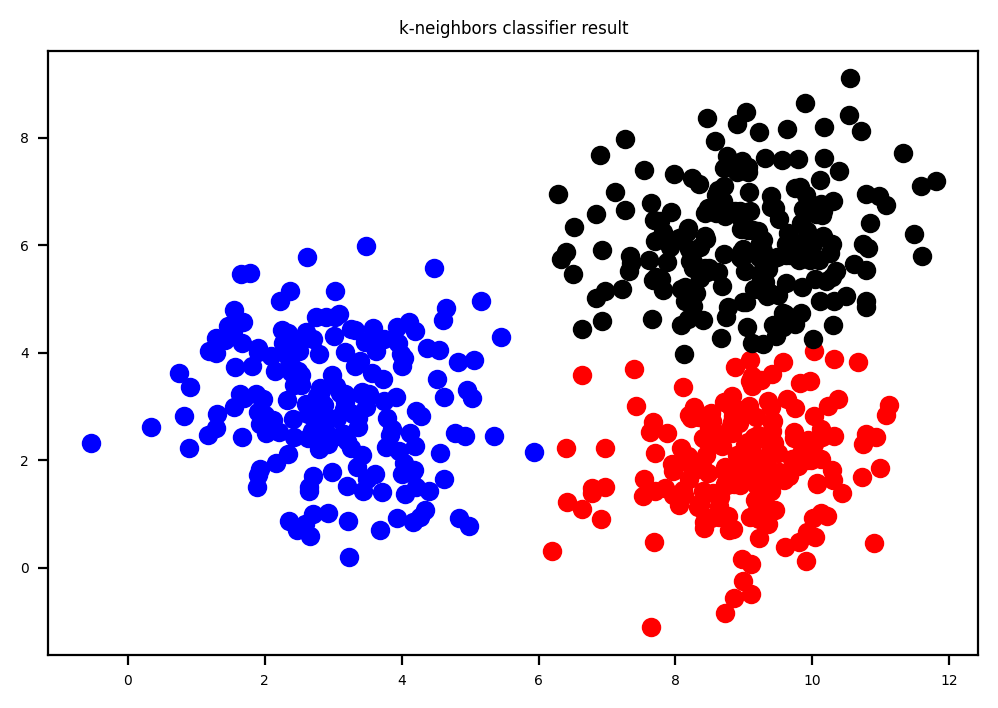

In [47]:
X = np.concatenate((data1, data2, data3), axis=0)
y = np.array([0] * SIZE + [1] * SIZE + [2] * SIZE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1./6.), random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

neight_data1, neight_data2, neight_data3 = split_predicted_data(X, neigh)

plt.plot(neight_data1[:,0], neight_data1[:,1], 'bo')
plt.plot(neight_data2[:,0], neight_data2[:,1], 'ro')
plt.plot(neight_data3[:,0], neight_data3[:,1], 'ko')
plt.title("k-neighbors classifier result")

plt.show()

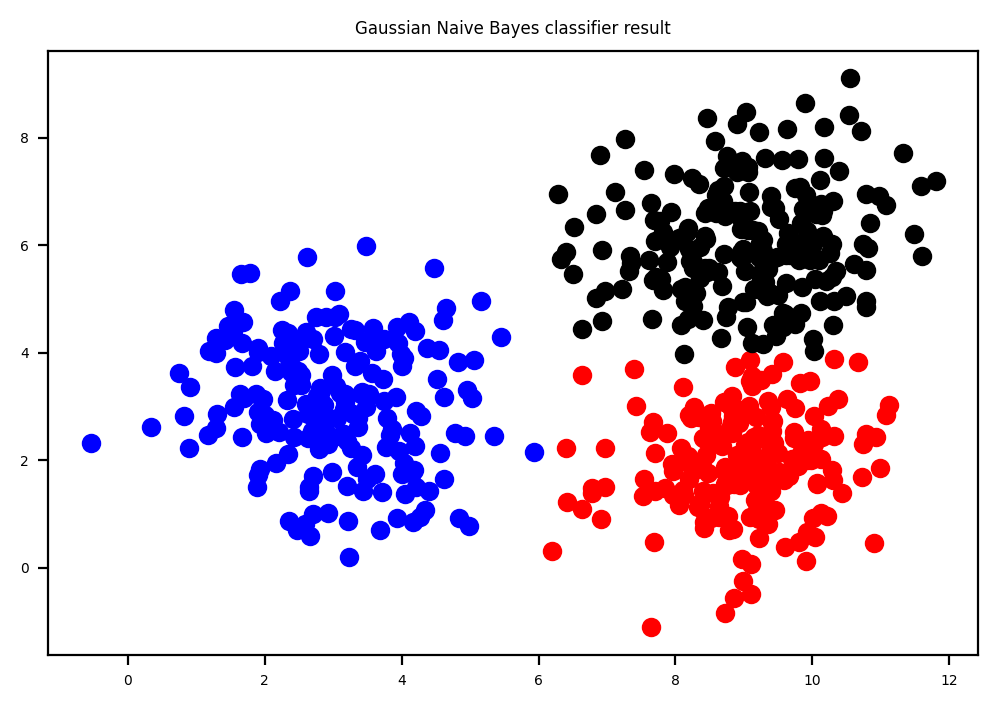

In [48]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_data1, gnb_data2, gnb_data3 = split_predicted_data(X, gnb)

plt.plot(gnb_data1[:,0], gnb_data1[:,1], 'bo')
plt.plot(gnb_data2[:,0], gnb_data2[:,1], 'ro')
plt.plot(gnb_data3[:,0], gnb_data3[:,1], 'ko')
plt.title("Gaussian Naive Bayes classifier result")

plt.show()

In [49]:
print("K-heigh train score: {:.5f}".format(neigh.score(X_train, y_train)))
print("K-heigh test score: {:.5f}".format(neigh.score(X_test, y_test)))
print("Gaussian Naive Bayes train score: {:.5f}".format(gnb.score(X_train, y_train)))
print("Gaussian Naive Bayes test score: {:.5f}".format(gnb.score(X_test, y_test)))

K-heigh train score: 0.98600
K-heigh test score: 0.97000
Gaussian Naive Bayes train score: 0.98400
Gaussian Naive Bayes test score: 0.97000


In [50]:
print("K-heigh train conf matrix")
print(confusion_matrix(y_train, neigh.predict(X_train)))
print("Gaussian Naive Bayes train conf matrix")
print(confusion_matrix(y_train, gnb.predict(X_train)))

print("K-heigh test conf matrix")
print(confusion_matrix(y_test, neigh.predict(X_test)))
print("Gaussian Naive Bayes test conf matrix")
print(confusion_matrix(y_test, gnb.predict(X_test)))

K-heigh train conf matrix
[[161   1   0]
 [  0 168   3]
 [  0   3 164]]
Gaussian Naive Bayes train conf matrix
[[161   1   0]
 [  0 167   4]
 [  0   3 164]]
K-heigh test conf matrix
[[36  2  0]
 [ 0 28  1]
 [ 0  0 33]]
Gaussian Naive Bayes test conf matrix
[[36  2  0]
 [ 0 28  1]
 [ 0  0 33]]
